In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Memuat dataset
dataset = pd.read_csv('CreditDataset.csv')

# Menampilkan informasi awal dataset
print(dataset.info())  # Untuk melihat tipe data
print(dataset.head())  # Untuk melihat 5 baris pertama

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB
None
    x1  

In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Memuat dataset
dataset = pd.read_csv('CreditDataset.csv')

# Menampilkan informasi awal dataset
print(dataset.info())  # Untuk melihat tipe data
print(dataset.head())  # Untuk melihat 5 baris pertama

# Memisahkan fitur (X) dan target (y)
X = dataset.drop(columns=["Class"])  # Fitur
y = dataset["Class"]                # Target

# Mengidentifikasi kolom kategorikal
categorical_columns = X.select_dtypes(include=['object']).columns

# One-Hot Encoding pada kolom kategorikal
# Changed 'sparse' to 'sparse_output' to match the latest scikit-learn API.
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' untuk menghindari multikolinearitas
X_encoded = encoder.fit_transform(X[categorical_columns])

# Menggabungkan kolom numerik dan yang sudah di-encode
numerical_columns = X.select_dtypes(include=['int64']).columns
X_numerical = X[numerical_columns].values
X_processed = pd.DataFrame(
    data=np.hstack([X_numerical, X_encoded]),
    columns=list(numerical_columns) + list(encoder.get_feature_names_out(categorical_columns))
)

# Standardisasi (Scaling) data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"Shape of Training Data: {X_train.shape}")
print(f"Shape of Testing Data: {X_test.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB
None
    x1  

In [ ]:
# Menginisialisasi dan melatih model SVM Regression
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)  # Kernel RBF sering digunakan dalam regresi
svr_model.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = svr_model.predict(X_test)


In [ ]:
# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)            # R-Squared

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")


Mean Squared Error: 0.19287118422566574
R-Squared: 0.0873123413265725


<ipython-input-6-93d6d9759d41>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Fit')


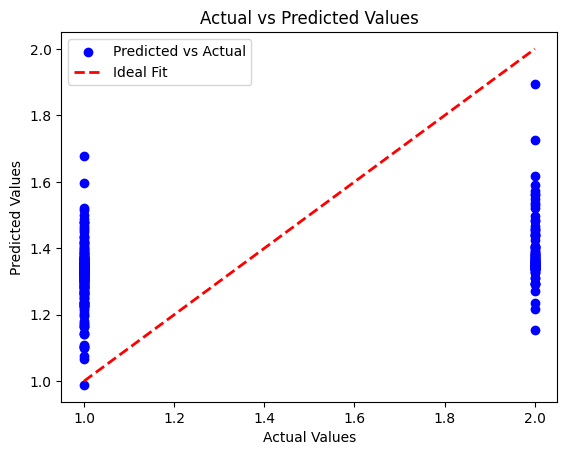

In [ ]:
import matplotlib.pyplot as plt

# Membuat scatter plot untuk membandingkan hasil prediksi dengan nilai aktual
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
